<a href="https://colab.research.google.com/github/ABSHYabhi/Yulu_Case_Study/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Yulu Business Case Study</center>

# Introduction
Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions. However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to delve into the factors influencing the demand for their shared electric cycles, specifically in the Indian market.  
The company wants to know:  
● Which variables are significant in predicting the demand for shared electric cycles in the
Indian market?  
● How well those variables describe the electric cycle demands.

# 1. Data

The dataset used for this analysis is publicly available at the following link - https://drive.google.com/file/d/1QywGPAD_CZTW0dF2H4XAg5ZlIjA9fazy/view?usp=sharing
# 2. Libraries
Below are the libraries required for analysing and visualizing data

In [ ]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Misc libraries
import random

# scipy stats library
import scipy.stats as stats

# 3. Data loading and exploratory data analysis

Loading the data into Pandas dataframe for easily handling of data

In [ ]:
# read the file into a pandas dataframe
!gdown 1QywGPAD_CZTW0dF2H4XAg5ZlIjA9fazy
df = pd.read_csv('bike_sharing.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

Downloading...
From: https://drive.google.com/uc?id=1QywGPAD_CZTW0dF2H4XAg5ZlIjA9fazy
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 24.3MB/s]
*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
******************************************

In [ ]:
# look at the top 5 rows
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Insight

- An initial overview of the dataset reveals 10886 entries across 12 columns, representing information recorded over distinct datetime values. The attributes include season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, and count.
- The datetime column, initially formatted as an object datatype, should be converted to datetime64 for more efficient date and time manipulation during analysis.
- Notably, the dataset contains no missing or null values, ensuring data completeness for analysis.

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB
None


In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
df.describe(include='category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


## Insight
- The **minimum timestamp** is **2011-01-01 00:00:00** and **maximum timestamp** is **2012-12-19 23:00:00** indicating there is data for around 2 years.
- The maximum number of user for a given timestamp is 977.

# 4. Detailed Analysis
## 4.1. Detecting outliers
### 4.1.1. Outliers for every continuous variable

In [ ]:
# helper function to detect outliers
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

In [ ]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
column_outlier_dictionary = {}
for column in numerical_columns:
    print("************************************")
    print(f'Outliers of \'{column}\' column are:')
    lower_outliers, higher_outliers = detectOutliers(df[column])
    print("Lower outliers:\n", lower_outliers)
    print("\nHigher outliers:\n", higher_outliers)
    print("************************************")
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]

************************************
Outliers of 'temp' column are:
Lower outliers:
 Series([], Name: temp, dtype: float64)

Higher outliers:
 Series([], Name: temp, dtype: float64)
************************************
************************************
Outliers of 'atemp' column are:
Lower outliers:
 Series([], Name: atemp, dtype: float64)

Higher outliers:
 Series([], Name: atemp, dtype: float64)
************************************
************************************
Outliers of 'humidity' column are:
Lower outliers:
 1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64

Higher outliers:
 Series([], Name: humidity, dtype: int64)
************************************
************************************
Outliers of 'windspeed' column are:
Lower outliers:
 Series([], Name: windspeed, dtype:

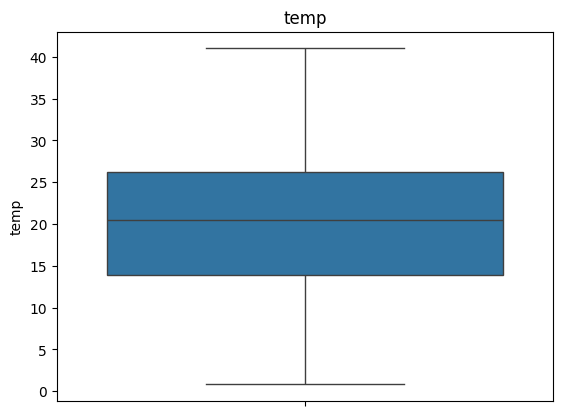

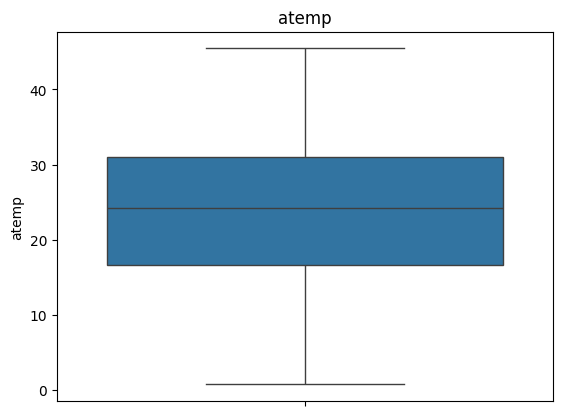

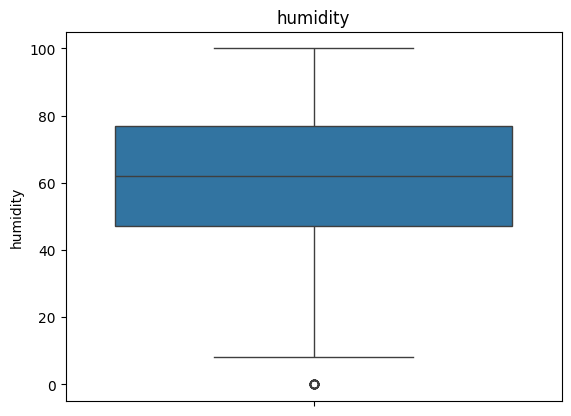

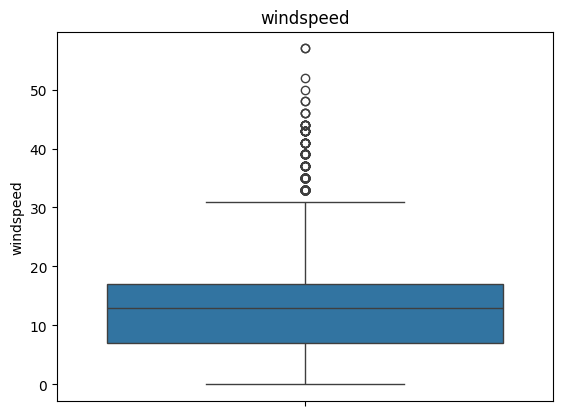

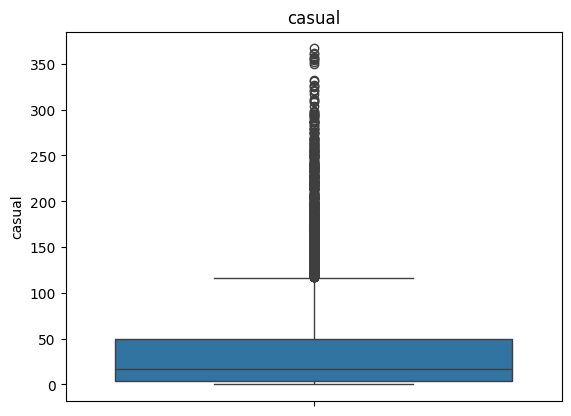

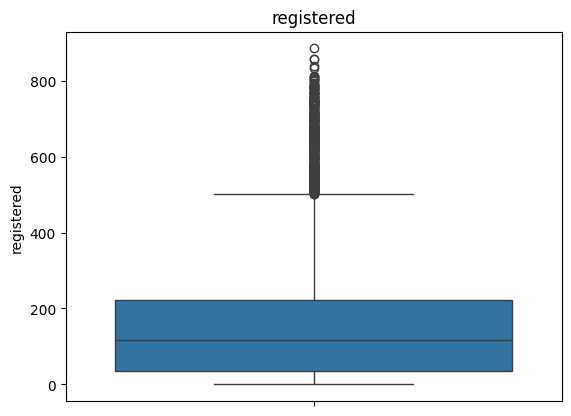

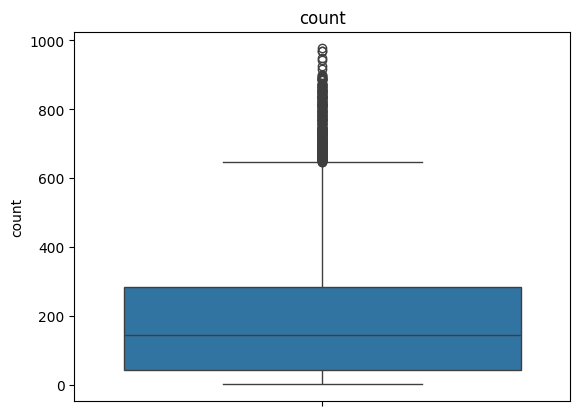

In [ ]:
for column in numerical_columns:
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.show()

In [ ]:
total_entries = df.shape[0]
for key, value in column_outlier_dictionary.items():
    total_outliers = len(value[0]) + len(value[1])
    outlier_percent = round((total_outliers/total_entries)*100, 2)
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers which is {outlier_percent}% of the data')

The column 'temp' has 0 outliers which is 0.0% of the data
The column 'atemp' has 0 outliers which is 0.0% of the data
The column 'humidity' has 22 outliers which is 0.2% of the data
The column 'windspeed' has 227 outliers which is 2.09% of the data
The column 'casual' has 749 outliers which is 6.88% of the data
The column 'registered' has 423 outliers which is 3.89% of the data
The column 'count' has 300 outliers which is 2.76% of the data


## Insight
- There are no outliers in *temp* and *atemp* columns.
- There are 22 outliers in *humidity*, 227 in *windspeed*, 749 in *casual*, 423 in *registered* and 300 in *count* column.

### 4.1.2. Remove the outliers

In [ ]:
if 0 :
    outlier_indices = []
    for key, value in column_outlier_dictionary.items():
        lower_outliers = value[0]
        higher_outliers = value[1]
        outlier_indices.extend(lower_outliers.index)
        outlier_indices.extend(higher_outliers.index)
    outlier_indices = list(set(outlier_indices))
    df.drop(outlier_indices, inplace=True)
    df.info()

## Insight
- Not removing any outliers

## 4.2. Univariate analysis
### 4.2.1. Numerical Variables

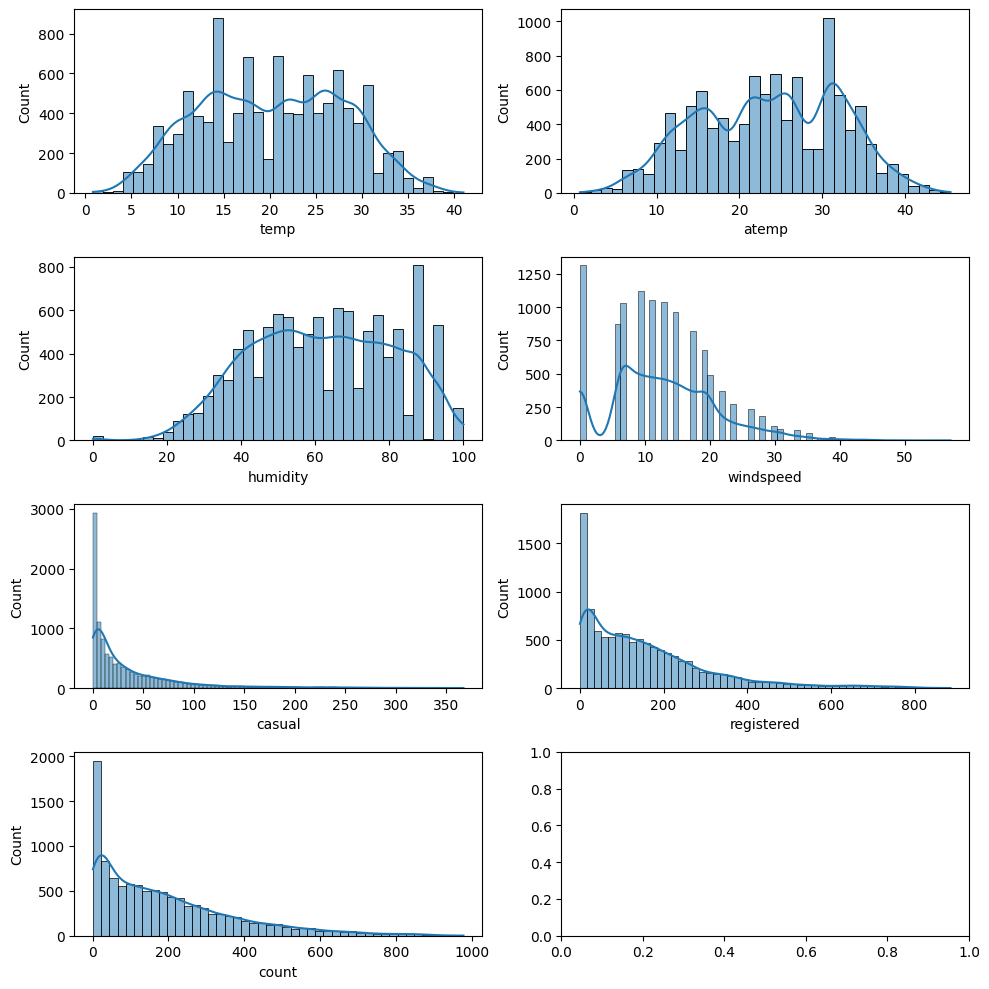

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(10, 10))

idx=0
for row in range(4):
    for col in range(2):
        if(idx < len(numerical_columns)):
            sns.histplot(ax=axes[row, col], data=df, x = numerical_columns[idx], kde=True)
        idx += 1
plt.tight_layout()
plt.show()

## Insight
- *temp*, *atemp* and *humidity* seems to follow normal distribution.
- *windspeed*, *casual*, *registered* and *count* seems to follow log-normal distribution

### 4.2.2. Categorical Variables

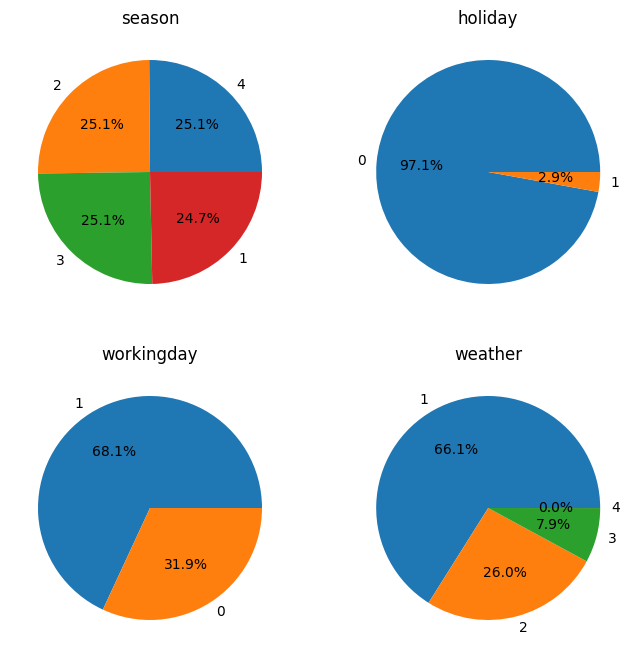

In [ ]:
# 'season', 'holiday', 'workingday', 'weather'
categorical_columns = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category"]
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
data = df["season"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("season")
plt.subplot(2,2,2)
data = df["holiday"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("holiday")
plt.subplot(2,2,3)
data = df["workingday"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("workingday")
plt.subplot(2,2,4)
data = df["weather"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("weather")
plt.show()

## Insight
- Bikes have been rented almost equally for all seasons(26% in spring, 24% in summer, 24% in fall and 26% in winter)
- As expected the bikes have been rented out more during *workingday* - 71%
- People prefer to rent bike during *Clear, Few clouds, partly cloudy* weather - 65%

## 4.3. Bivariate analysis
### 4.3.1. Numerical Variables

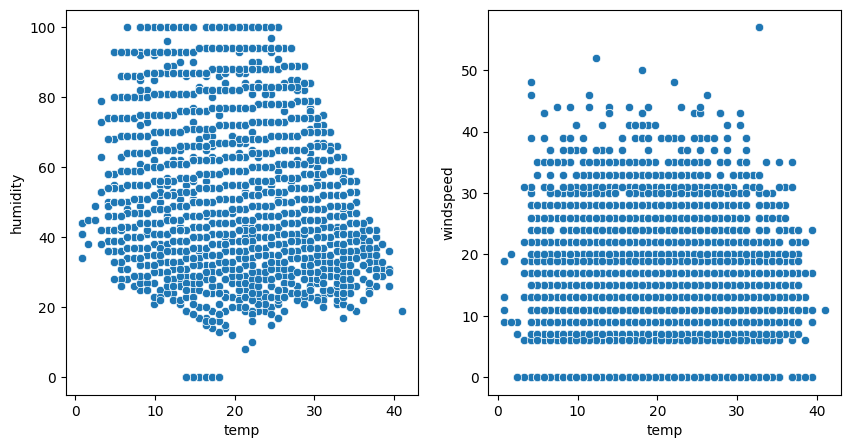

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10, 5))
sns.scatterplot(ax=axes[0], data= df, x='temp', y='humidity')
sns.scatterplot(ax=axes[1], data= df, x='temp', y='windspeed')
plt.show()

### 4.3.2. Categorical Variables

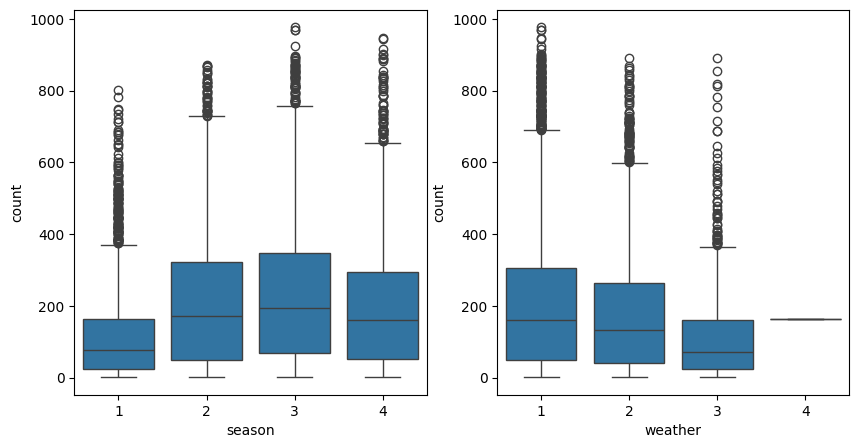

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10, 5))
sns.boxplot(ax = axes[0], data= df, x='season', y='count')
sns.boxplot(ax = axes[1], data= df, x='weather', y='count')
plt.show()

## Insight
- Comparatively, more bikes are rented during summer, fall and winter.
- Almost no bikes are rented during Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

## Relationship between dependent variable "Count" and independent variables

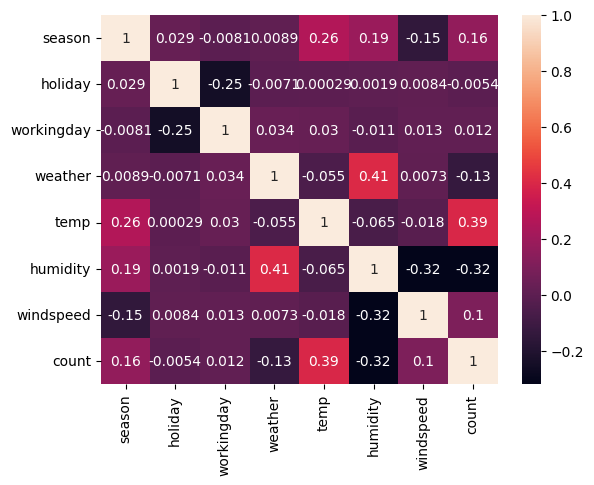

In [ ]:
reduced_df = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'count']]
sns.heatmap(reduced_df.corr(), annot=True)
plt.show()

## Insight
- As expected humidity and weather are correlated
- It is interesteting to see no. of bikes rides being related to temperature

## 5. Tests
### 5.1. Is there any significant difference between the no. of bike rides on Weekdays and Weekends
- **Null Hypothesis(H0)** :There is no difference between the no. of bike rides on Weekdays and Weekends
- **Alternate Hypothesis(H1)** :There is difference between the no. of bike rides on Weekdays and Weekends
- **Significance level** : 5%

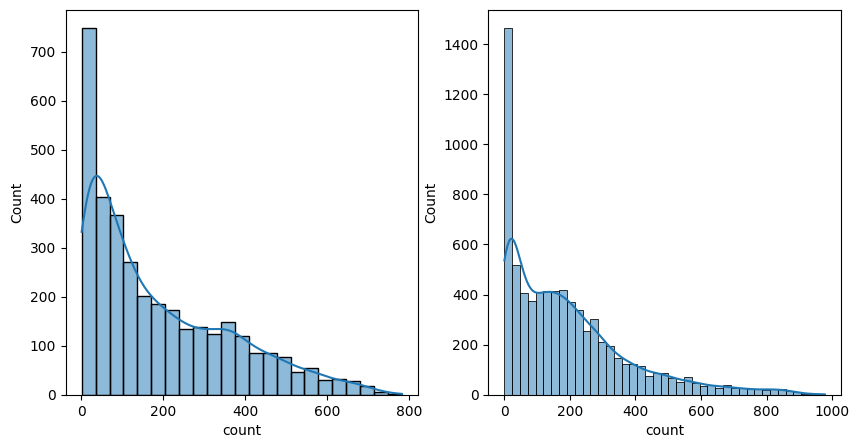

In [ ]:
g1 = df[df['workingday'] == 0]['count']
g2 = df[df['workingday'] == 1]['count']
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10, 5))
sns.histplot(ax=axes[0], x=g1, kde=True)
sns.histplot(ax=axes[1], x=g2, kde=True)
plt.show()

#### Test for normal distribution - Shapiro-Wilk test

In [ ]:
print("Group1:")
test_stat, p_value = stats.shapiro(g1)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

print("Group2:")
test_stat, p_value = stats.shapiro(g2)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

Group1:
p-value:  4.4728547627911074e-45
The sample doe not follow normal distribution
Group2:
p-value:  2.2521124830019574e-61
The sample doe not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


#### Test for equale variance - Lavene's test

In [ ]:
test_stat, p_value = stats.levene(g1, g2)
print('p-value', p_value)
if p_value > 0.05:
    print('The samples have homogenous variance')
else:
    print('The samples do not have homogenous variance')

p-value 0.9437823280916695
The samples have homogenous variance


Since the data doesnt follow normal distribution, Z, T and ANOVA tests cannot be applied. We will apply the Mann-Whitney U-Test for two independent samples

In [ ]:
test_stat, p_value = stats.mannwhitneyu(g1, g2)
print('p-value', p_value)
if p_value > 0.05:
    print('Fail to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

p-value 0.9679139953914079
Fail to reject Null Hypothesis


## Insight
- There is no significant differnce between the no. of bike rides on Weekdays and Weekends

### 5.2. Is the demand of bicycles on rent the same for different Weather conditions?
- **Null Hypothesis(H0)** : The demand for bicycles on rent is the same for different weather conditions.
- **Alternate Hypothesis(H1)** : The demand for bicycles on rent is different for different weather conditions.
- **Significance level** : 5%

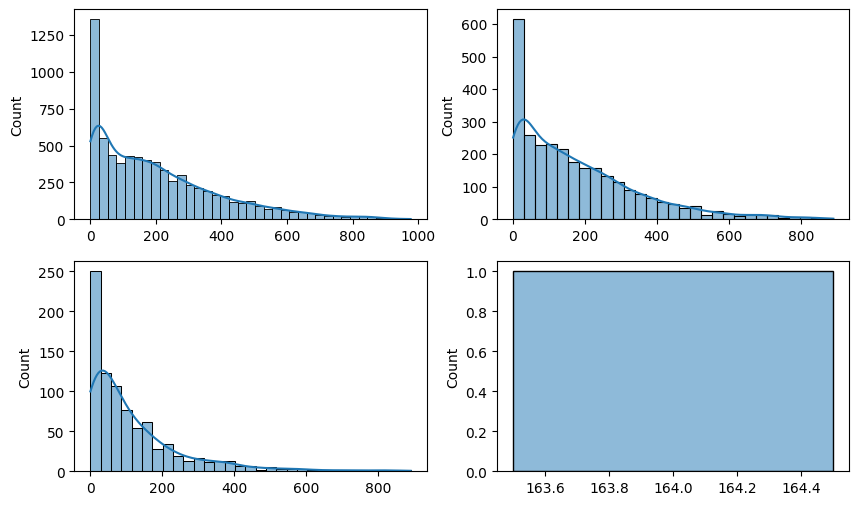

In [ ]:
g1 = df[df['weather'] == 1]['count'].values
g2 = df[df['weather'] == 2]['count'].values
g3 = df[df['weather'] == 3]['count'].values
g4 = df[df['weather'] == 4]['count'].values
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(10, 6))
sns.histplot(ax=axes[0, 0], x=g1, kde=True)
sns.histplot(ax=axes[0, 1], x=g2, kde=True)
sns.histplot(ax=axes[1, 0], x=g3, kde=True)
sns.histplot(ax=axes[1, 1], x=g4, kde=True)
plt.show()

#### Test for normal distribution - Shapiro-Wilk test

In [ ]:
print("Group1:")
test_stat, p_value = stats.shapiro(g1)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

print("Group2:")
test_stat, p_value = stats.shapiro(g2)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

print("Group3:")
test_stat, p_value = stats.shapiro(g3)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

Group1:
p-value:  1.5964921477006555e-57
The sample doe not follow normal distribution
Group2:
p-value:  9.777839106111785e-43
The sample doe not follow normal distribution
Group3:
p-value:  3.875893017396149e-33
The sample doe not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


#### Test for equale variance - Lavene's test

In [ ]:
test_stat, p_value = stats.levene(g1, g2, g3)
print('p-value', p_value)
if p_value > 0.05:
    print('The samples have homogenous variance')
else:
    print('The samples do not have homogenous variance')

p-value 6.198278710731511e-36
The samples do not have homogenous variance


**Note** : Group4 is not used as it has only one data point.  
Since the data doesnt follow normal distribution and doesnt show homogenous variances between groups, Z, T and ANOVA tests cannot be applied. Since there are multiple groups, we will test using Kruskal-Wallis Test.

In [ ]:
test_stat, p_value = stats.kruskal(g1, g2, g3)
print('p-value', p_value)
if p_value > 0.05:
    print('Fail to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

p-value 3.122066178659941e-45
Reject Null Hypothesis


## Insight
- The demand for bicycles on rent is different for different weather conditions.

### 5.3. Is the demand of bicycles on rent the same for different Seasons?
- **Null Hypothesis(H0)** : The demand for bicycles on rent is the same for different seasons.
- **Alternate Hypothesis(H1)** : The demand for bicycles on rent is different for different seasons.
- **Significance level** : 5%

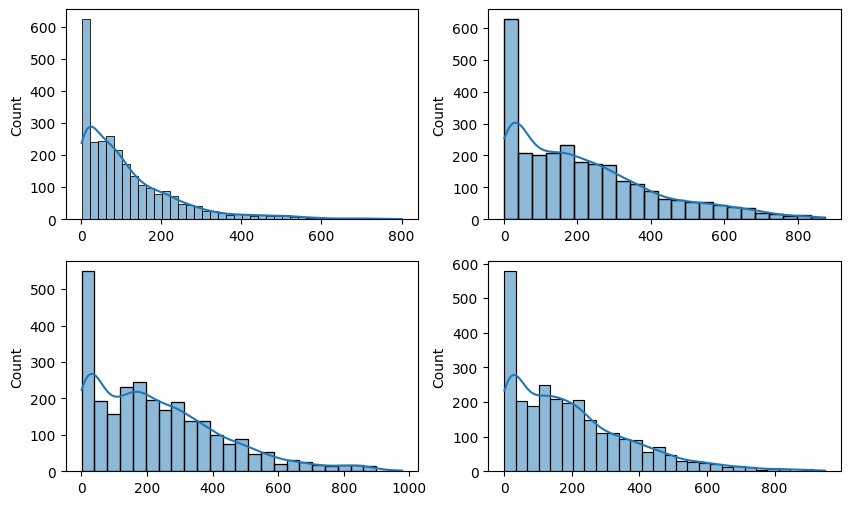

In [ ]:
g1 = df[df['season'] == 1]['count'].values
g2 = df[df['season'] == 2]['count'].values
g3 = df[df['season'] == 3]['count'].values
g4 = df[df['season'] == 4]['count'].values
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(10, 6))
sns.histplot(ax=axes[0, 0], x=g1, kde=True)
sns.histplot(ax=axes[0, 1], x=g2, kde=True)
sns.histplot(ax=axes[1, 0], x=g3, kde=True)
sns.histplot(ax=axes[1, 1], x=g4, kde=True)
plt.show()

#### Test for normal distribution - Shapiro-Wilk test

In [ ]:
print("Group1:")
test_stat, p_value = stats.shapiro(g1)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

print("Group2:")
test_stat, p_value = stats.shapiro(g2)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

print("Group3:")
test_stat, p_value = stats.shapiro(g3)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

print("Group4:")
test_stat, p_value = stats.shapiro(g4)
print('p-value: ', p_value)
if p_value > 0.05:
    print('The sample follows normal distribution')
else:
    print('The sample doe not follow normal distribution')

Group1:
p-value:  8.749584618867662e-49
The sample doe not follow normal distribution
Group2:
p-value:  6.039374406270491e-39
The sample doe not follow normal distribution
Group3:
p-value:  1.043680518918597e-36
The sample doe not follow normal distribution
Group4:
p-value:  1.1299244409282836e-39
The sample doe not follow normal distribution


#### Test for equale variance - Lavene's test

In [ ]:
test_stat, p_value = stats.levene(g1, g2, g3, g4)
print('p-value', p_value)
if p_value > 0.05:
    print('The samples have homogenous variance')
else:
    print('The samples do not have homogenous variance')

p-value 1.0147116860043298e-118
The samples do not have homogenous variance


Since the data doesn't follow normal distribution and doesnt show homogenous variances between groups, Z, T and ANOVA tests cannot be applied. Since there are multiple groups, I will test using Kruskal-Wallis Test.

In [ ]:
test_stat, p_value = stats.kruskal(g1, g2, g3, g4)
print('p-value', p_value)
if p_value > 0.05:
    print('Fail to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

p-value 2.479008372608633e-151
Reject Null Hypothesis


## Insight
- The demand for bicycles on rent is different for different seasons.

### 5.4. Are the weather conditions significantly different during different seasons?
- **Null Hypothesis(H0)** : The weather conditions are same during different seasons.
- **Alternate Hypothesis(H1)** : The weather conditions are significantly differet during different seasons.
- **Significance level** : 5%  
As the groups are categorical, we will use Chi-Square test

In [ ]:
cross = pd.crosstab(index = df['weather'],
                    columns = df['season'],
                    values = df['count'],
                    aggfunc = np.sum)
print(cross)

season        1       2       3       4
weather                                
1        223009  426350  470116  356588
2         76406  134177  139386  157191
3         12919   27755   31160   30255
4           164       0       0       0


<ipython-input-30-9eddac5f2a1e>:1: FutureWarning: The provided callable <function sum at 0x7cfdaa784670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cross = pd.crosstab(index = df['weather'],


Since the last row, weather 4 has 0 for 3 out of 4 columns, we will not consider weather 4

In [ ]:
cross = pd.crosstab(index = df[df['weather'] != 4]['weather'],
                    columns = df['season'],
                    values = df['count'],
                    aggfunc = np.sum).to_numpy()[:3, :]
print(cross)

[[223009 426350 470116 356588]
 [ 76406 134177 139386 157191]
 [ 12919  27755  31160  30255]]


<ipython-input-31-d145d920f849>:1: FutureWarning: The provided callable <function sum at 0x7cfdaa784670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cross = pd.crosstab(index = df[df['weather'] != 4]['weather'],


In [ ]:
test_stat, p_value, _, _ = stats.chi2_contingency(cross)
print('p-value', p_value)
if p_value > 0.05:
    print('Fail to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

p-value 0.0
Reject Null Hypothesis


## Insight
- The weather conditions are significantly different during different seasons.

# 6. Recommendation

- Focus marketing efforts on promoting rentals during summer, fall, and winter months, as these periods show higher demand. Use targeted discounts and promotions to attract more users during spring when demand is relatively lower.
- Encourage rentals during favorable weather conditions by highlighting convenience and comfort. To sustain demand during extreme weather, introduce special discounts or bundled offers to retain users.
- Launch awareness campaigns emphasizing the environmental benefits of using electric bikes, positioning them as a sustainable and eco-friendly commuting option.
- Optimize inventory management by analyzing seasonal, weather, and temperature trends, ensuring bikes are available when and where demand is highest.